# AutoViML NLP

Source: https://github.com/AutoViML/deep_autoviml/blob/master/examples/Deep_Auto_ViML_NLP_Demo.ipynb

# Setup

In [1]:
!pip install kaggle
!pip install deep_autoviml

In [2]:
from deep_autoviml import deep_autoviml as deepauto
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


Imported deep_auto_viml. version=0.0.67
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


# Fetch Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!mkdir '/root/.kaggle'
!chmod 600 '/content/drive/My Drive/297 2021/kaggle.json'
!cp '/content/drive/My Drive/297 2021/kaggle.json' '/root/.kaggle/'

In [11]:
!kaggle datasets download arkhoshghalb/twitter-sentiment-analysis-hatred-speech

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: unrecognized arguments: .


In [12]:
!unzip twitter-sentiment-analysis-hatred-speech.zip

Archive:  twitter-sentiment-analysis-hatred-speech.zip
  inflating: test.csv                
  inflating: train.csv               


In [13]:
!ls

drive	     test.csv	twitter-sentiment-analysis-hatred-speech.zip
sample_data  train.csv


# Loading Data

In [16]:
datapath = './'
sep = ','
filename = 'train.csv'
df = pd.read_csv(datapath+filename,sep=sep)
target = 'label'
print(df.shape)
df.head(1)

(31962, 3)


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...


In [17]:
df[target].value_counts()


0    29720
1     2242
Name: label, dtype: int64

# Model

In [3]:
BATCHSIZE = 256
CLASSES = 10
EPOCHS = 25
NUM_TRIALS = 5

In [18]:
keras_model_type =  "USE" ## always try "auto" first, then "basic", "deep", "BERT", "USE", cnn1", "LSTM" etc.
keras_options = {"early_stopping": True, 'epochs': 350, 'steps_per_epoch': 15, 'class_weight': True}  ### always set early_stopping to True first and then change it to False
model_options = {'tuner':"storm", "max_trials":10, }

## always set the tuner to "storm" first and then "optuna"
#### You always need 15 max_trials to get something decent #####
trainfile = datapath+filename

    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    epochs : 350
    steps_per_epoch : 15
    class_weight : True
    early_stopping : True
Using following model_options given as input:
    max_trials : 10
    tuner : storm
Max Trials : 10. Please increase max_trials if you want to better accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
CSV file being loaded into tf.data.Dataset
    Since number of rows > maxrows, loading a random sample of 10000 rows into pandas for EDA
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Model type is Classification and Single_Label problem
Loaded a small data sample of size = (10000, 3) into pandas dataframe to analyze...
    Classifying

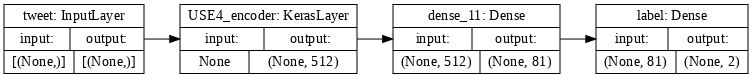

Model plot saved in file: deep_autoviml_churn_1_USE_model_before.png

#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Training a USE model option...
    class_weights: {0: 1.0, 1: 7.256894049346879}
    original datasize = 31963, initial batchsize = 32
    recommended steps per epoch = 499
    recommended OneCycle steps = 349650
    default initializer = lecun_normal, default activation = selu
    Recommended: Increase patience for "onecycle" scheduler
Tensorboard log directory can be found at: deep_autoviml/mylogs
    chosen keras LR scheduler = default
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10.0
    number of epochs = 350, steps per epoch = 15

Splitting train into 80+20 percent: train and validation data
    Splitting validation 20 into

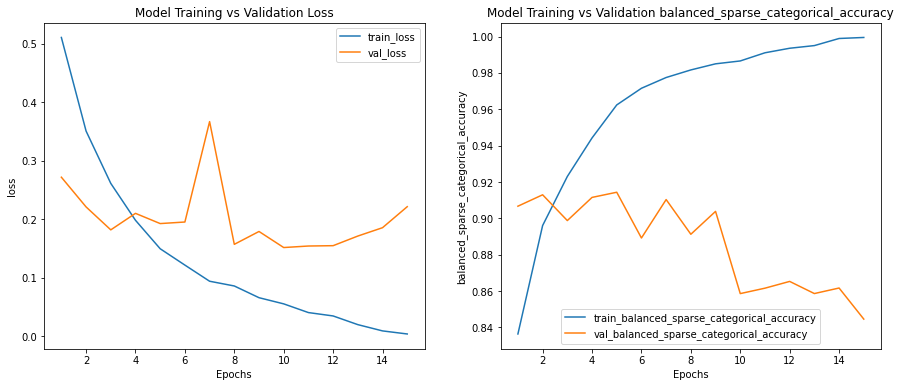


###########################################################
         Held-out test data set Results:
Single Label, Multi Class Model Metrics Report: label
#################################################################


    Accuracy          = 90.4%
    Balanced Accuracy = 91.4%
    Precision         = 40.8%
    Average Precision = 70.1%
    Recall            = 92.6%
    F1 Score          = 56.6%
    ROC AUC           = 96.9%
#####################################################

Training on full train dataset for 5 epochs. This will take time...
    completed. Time taken (in mins) = 1


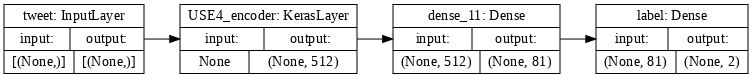

Model plot saved in file: deep_autoviml_churn_1_USE_model_after.png


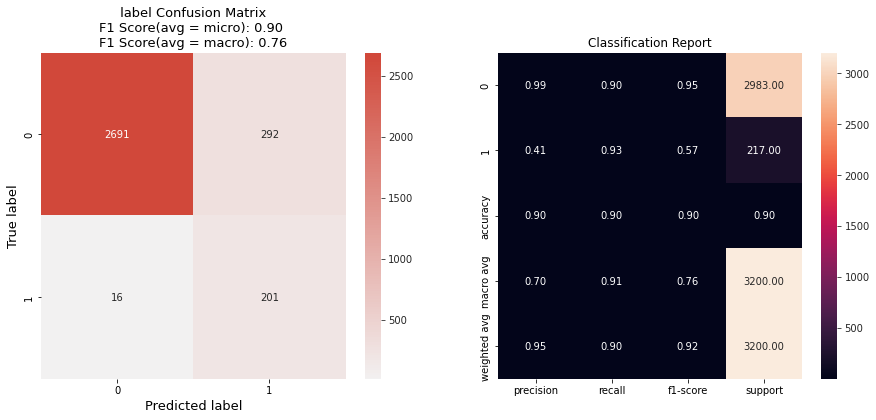

In [19]:
model, dicti = deepauto.fit(trainfile, target, keras_model_type=keras_model_type, 
                            project_name='churn_1',
                 save_model_flag=False, model_options=model_options,
                            keras_options=keras_options, use_my_model='', verbose=2)

# Evaluation

In [22]:
filename = 'train.csv'
testfile = datapath+filename

In [23]:
predictions = deepauto.predict(model, project_name='churn_1', test_dataset=testfile,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=dicti)


Loading deep_autoviml model from <keras.engine.functional.Functional object at 0x7fa633527450> folder. This will take time...

Using <keras.engine.functional.Functional object at 0x7fa633527450> model provided as input...
Time taken to load saved model = 0 seconds
Loaded test data size: 31962
Alert! Modified column names to satisfy rules for column names in Tensorflow...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    3 Predictors classified...
    possible latitude columns in dataset: []
        after further analysis, no latitude columns found
    possible longitude columns in dataset: []
        after further analysis, no longitude columns found
        1 variable(s) to be removed since they were ID or low-information variables
Distribution of string columns in datatset:
    number of binary = 0, cats = 0, high cats = 0, very high cats = 1
Distribution of integer columns in datatset:
    number of binary = 1, ca

In [26]:
print(predictions[-1])

[0 0 0 ... 0 1 0]
